## *R*andom *S*ampling *plus* *F*ake *D*ata (RS+FD)

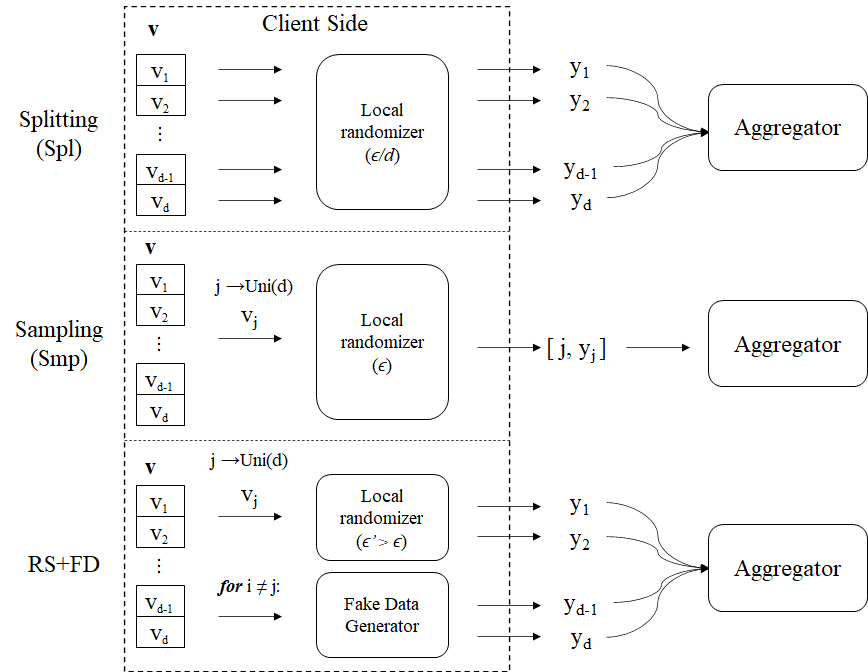

## Some libraries

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'15',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13',
          'font.size':'15',
          'legend.fontsize':'medium',
          'lines.linewidth':'2',
          'font.weight':'normal',
          'lines.markersize':'10'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
%matplotlib inline

import sympy as sym
from mpl_toolkits.mplot3d import Axes3D

## Expectation of the estimator for RS+FD[GRR] - Eq. (4)

In [2]:
n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
p = sym.Symbol('p')
q = sym.Symbol('q')
f = sym.Symbol('f')

E_n = (1/d) * (p*n*f + q*(n - n*f)) + (d-1)/(d*k) *n 
E_f = (d*E_n/(n*(p-q)) - (d-1+q*k)/(k*(p-q))) 
sym.simplify(E_f)

f

## Expectation of the estimator for RS+FD[OUE-z] - Eq. (8)

In [3]:
n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
p = sym.Symbol('p')
q = sym.Symbol('q')
f = sym.Symbol('f')

E_n = (n/d) * (p*f + q*(1-f)) + (d-1)*n*q/d 
E_f = d/(n*(p-q)) *E_n - d*q/(p-q)
sym.simplify(E_f)

f

## Expectation of the estimator for RS+FD[OUE-r] -  Eq. (10)

In [4]:
n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
p = sym.Symbol('p')
q = sym.Symbol('q')
f = sym.Symbol('f')

E_n = n/d * (f *(p-q) +q ) + (n*(d-1)/(d*k)) * (p-q+k*q)
E_f = d*E_n/(n*(p-q)) - ((p-q)*(d-1)+q*d*k)/(k*(p-q))
sym.simplify(E_f)

f

## RS+FD[GRR] Variance

In [5]:
f = 0#sym.Symbol('f')

d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_grr = sym.exp(eps)/(sym.exp(eps)+k-1)
q_grr = (1-p_grr)/(k-1)

sig_grr = (1/d) * (q_grr + f*(p_grr - q_grr) + (d-1)/k)
var_RSpFD_GRR= sym.simplify((d**2 * sig_grr * (1-sig_grr))/(p_grr-q_grr)**2)
var_RSpFD_GRR

(k + (d - 1)*(k + exp(\epsilon) - 1))*(d*k*(k + exp(\epsilon) - 1) - k - (d - 1)*(k + exp(\epsilon) - 1))/(k**2*(1 - exp(\epsilon))**2)

## RS+FD[OUE-z] Variance

In [6]:
f = 0#sym.Symbol('f')

d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_oue = 0.5
q_oue = 1/(sym.exp(eps)+1)

sig_oue_z = (1/d) * (d*q_oue + f*(p_oue - q_oue))
var_RSpFD_OUE_z = sym.simplify((d**2 * sig_oue_z * (1-sig_oue_z))/(p_oue-q_oue)**2)
var_RSpFD_OUE_z

1.0*d**2/sinh(\epsilon/2)**2

## RS+FD[OUE-r] Variance

In [7]:
f = 0#sym.Symbol('f')

d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_oue = 0.5
q_oue = 1/(sym.exp(eps)+1)

sig_oue_r = (1/d) * (f*(p_oue-q_oue) + q_oue + (d-1)*(p_oue/k + (k-1)*(q_oue/k)))
var_RSpFD_OUE_r = sym.simplify((d**2 * sig_oue_r * (1-sig_oue_r))/(p_oue-q_oue)**2)
var_RSpFD_OUE_r

4.0*(k + (d - 1)*(k + 0.5*exp(\epsilon) - 0.5))*(d*k*(exp(\epsilon) + 1) - k - (d - 1)*(k + 0.5*exp(\epsilon) - 0.5))/(k**2*(1 - exp(\epsilon))**2)

## Analytical analysis: RS+FD[ADP]

In [8]:
f = 0#sym.Symbol('f')

n = sym.Symbol('n')
d = sym.Symbol('d')
k = sym.Symbol('k')
eps = sym.Symbol('\epsilon')
p_grr = sym.exp(eps)/(sym.exp(eps)+k-1)
q_grr = (1-p_grr)/(k-1)

sig_grr = (1/d) * (q_grr + f*(p_grr - q_grr) + (d-1)/k)
var_RSpFD_GRR= sym.simplify((d**2 * sig_grr * (1-sig_grr))/(n*(p_grr-q_grr)**2))

p_oue = 0.5
q_oue = 1/(sym.exp(eps)+1)

sig_oue_z = (1/d) * (d*q_oue + f*(p_oue - q_oue))
var_RSpFD_OUE_z = sym.simplify((d**2 * sig_oue_z * (1-sig_oue_z))/(n*(p_oue-q_oue)**2))
resul = sym.simplify(var_RSpFD_GRR-var_RSpFD_OUE_z)
resul

-(2.0*d**2*k**2*(exp(\epsilon) - 1)**2 + 2*(k + (d - 1)*(k + exp(\epsilon) - 1))*(-d*k*(k + exp(\epsilon) - 1) + k + (d - 1)*(k + exp(\epsilon) - 1))*sinh(\epsilon/2)**2)/(k**2*n*(exp(\epsilon) - 1)**2*(cosh(\epsilon) - 1))

In [9]:
def Variance_RSpFD_ADP(d, k, eps=np.log(3)):
    
    n= 10000 # number of users
    f=0
    
    #flipping probabilities with GRR
    p1 = np.exp(eps)/(np.exp(eps)+k-1)
    q1 = (1-p1)/(k-1)
    
    #flipping probabilities with OUE
    p2 = 1/2
    q2 = 1/(np.exp(eps) +1)
    
    delta1 = (q1 + f*(p1-q1) + (d-1)/k)
    d1md1 = delta1 * (1-delta1)
    
    delta2 = (d* q2 + f*(p2-q2))
    ineq = delta1*(d-delta1)*(p2-q2)**2 - delta2 * (d - delta2) * (p1 - q1) ** 2
    
    return -(2.0*d**2*k**2*(np.exp(eps) - 1)**2 + 2*(k + (d - 1)*(k + np.exp(eps) - 1))*(-d*k*(k + np.exp(eps) - 1) + k + (d - 1)*(k + np.exp(eps) - 1))*np.sinh(eps/2)**2)/(k**2*n*(np.exp(eps) - 1)**2*(np.cosh(eps) - 1))

## Generating Fig. 5 of the paper

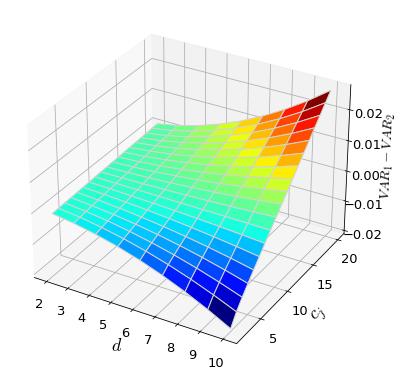

In [10]:
x = np.arange(2,11,1) #number of attributes
y = np.arange(2,21,1) #number of values per attribute
X, Y = np.meshgrid(x, y)
Z = Variance_RSpFD_ADP(X, Y)
fig = plt.figure(figsize = (10,5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='lightgrey')
ax.set_xlabel('$d$', fontsize = 18)
ax.set_ylabel('$c_j$', fontsize = 18)
ax.set_yticks([5,10,15,20])
ax.set_zlabel('$VAR_1 - VAR_2$', fontsize = 14)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.savefig('RS_FD_fig_surface_variance.pdf',dpi=500, bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

# Analytical VS experimental: Synthetic Datasets (uniform distribution)

In [11]:
def Var_RSpFD_GRR(n, d, k, p, q): #cf. Eq. (5)
    f_vi = 1/k  #uniform distribution
    
    sig_grr = (1/d) * (q + f_vi*(p-q) + (d-1)/k)
    
    var_grr = ((d**2 * sig_grr * (1-sig_grr))/(n*(p-q)**2))
    
    return var_grr

def Var_RSpFD_OUE_z(n, d, k, p, q): #cf. Eq. (9)
    f_vi = 1/k  #uniform distribution
    
    sig_oue_z = (1/d) * (d*q + f_vi * (p-q))
    
    var_oue_z = ((d**2 * sig_oue_z * (1-sig_oue_z))/(n*(p-q)**2))
    
    return var_oue_z

def Var_RSpFD_OUE_r(n, d, k, p, q): #cf. Eq. (11)
    f_vi = 1/k  #uniform distribution
    
    sig_oue_r = (1/d) * (f_vi * (p-q) + q + (d-1) * ((p/k) + ((k-1)/(k))*q) )
    
    var_oue_r = ((d**2 * sig_oue_r * (1-sig_oue_r))/(n*(p-q)**2))
    
    return var_oue_r

## Analytical Evaluation

In [12]:
# The values used for simulation here can be found in Subsection 4.1 - Setup of experiments

# Range of epsilon used in the experiments
lst_eps = [round(np.log(val),4) for val in range(2,8)] 

# Parameters of Synthetic Dataset 3. 
n = 50000 #number of users
d = 10 #number of attributes
beta = 1/d #sampling rate
K = [10 for _ in range(d)] #number of values per attribute is uniform, i.e., 10

# Initialize list of averaged variance values per epsilon
lst_var_RSpFD_GRR = []
lst_var_RSpFD_OUE_z = []
lst_var_RSpFD_OUE_r = []

for eps in lst_eps:
    eps_l = np.log((np.exp(eps) - 1 + beta)/beta) #amplified epsilon
    
    # Initialize list of variance values per attribute
    lst_var_att_grr = []
    lst_var_att_oue_z = []
    lst_var_att_our_r = []
    
    for k in K: # for each attribute
        
        p = np.exp(eps_l) / (np.exp(eps_l) + k - 1) # GRR
        q = (1 - p) / (k - 1) # GRR
        
        p_ue = 1/2 #OUE
        q_ue = 1 / (np.exp(eps_l)+1) #OUE
        
        lst_var_att_grr.append(Var_RSpFD_GRR(n, d, k, p, q))
           
        lst_var_att_oue_z.append(Var_RSpFD_OUE_z(n, d, k, p_ue, q_ue))
        
        lst_var_att_our_r.append(Var_RSpFD_OUE_r(n, d, k, p_ue, q_ue))
           
    # We'll average the MSE over the number of attributes (cf. Eq. 13 of the paper)
    lst_var_RSpFD_GRR.append(np.mean(lst_var_att_grr))
    lst_var_RSpFD_OUE_z.append(np.mean(lst_var_att_oue_z))
    lst_var_RSpFD_OUE_r.append(np.mean(lst_var_att_our_r))

## Reading Experimental Evaluation results

In [13]:
# This requires executing the notebook 2_RS+FD_LDP_Synthetic3_50k_d10.ipynb

syn3_rs_fd_grr = pd.read_csv('results/synthetic3/final_results_rs_fd_grr.csv', header=None, index_col=0)
syn3_rs_fd_oue_z = pd.read_csv('results/synthetic3/final_results_rs_fd_oue_z.csv', header=None, index_col=0)
syn3_rs_fd_oue_r = pd.read_csv('results/synthetic3/final_results_rs_fd_oue_r.csv', header=None, index_col=0)
syn3_rs_fd_grr.shape, syn3_rs_fd_oue_z.shape, syn3_rs_fd_oue_r.shape #100 evaluations

((100, 6), (100, 6), (100, 6))

## Plotting Curves

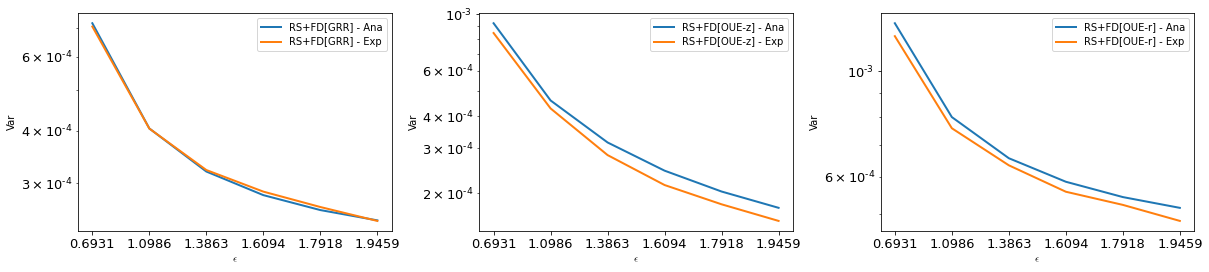

In [14]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
plt.subplots_adjust(wspace=0.28)

ax[0].plot(lst_var_RSpFD_GRR, label='RS+FD[GRR] - Ana')
ax[0].plot(syn3_rs_fd_grr.mean().values, label='RS+FD[GRR] - Exp')
ax[1].plot(lst_var_RSpFD_OUE_z, label='RS+FD[OUE-z] - Ana')
ax[1].plot(syn3_rs_fd_oue_z.mean().values, label='RS+FD[OUE-z] - Exp')
ax[2].plot(lst_var_RSpFD_OUE_r, label='RS+FD[OUE-r] - Ana')
ax[2].plot(syn3_rs_fd_oue_r.mean().values, label='RS+FD[OUE-r] - Exp')

for i in range(3):
    ax[i].set_xticks(range(len(lst_eps)))
    ax[i].set_xticklabels(lst_eps)
    ax[i].legend();
    ax[i].set_ylabel('Var')
    ax[i].set_xlabel('$\epsilon$')
    ax[i].set_yscale('log')

# Analytical VS experimental: real-world datasets

In [15]:
# RS+FD variance values

def Var_RSpFD_GRR(n, d, k, p, q): #cf. Eq. (5)
    f_vi = 0 # approximate variance
    
    sig_grr = (1/d) * (q + f_vi*(p-q) + (d-1)/k)
    
    var_grr = ((d**2 * sig_grr * (1-sig_grr))/(n*(p-q)**2))
    
    return var_grr

def Var_RSpFD_OUE_z(n, d, k, p, q): #cf. Eq. (9)
    f_vi = 0 # approximate variance
    
    sig_oue_z = (1/d) * (d*q + f_vi * (p-q))
    
    var_oue_z = ((d**2 * sig_oue_z * (1-sig_oue_z))/(n*(p-q)**2))
    
    return var_oue_z

def Var_RSpFD_OUE_r(n, d, k, p, q): #cf. Eq. (11)
    f_vi = 0 # approximate variance
    
    sig_oue_r = (1/d) * (f_vi * (p-q) + q + (d-1) * ((p/k) + ((k-1)/(k))*q) )
    
    var_oue_r = ((d**2 * sig_oue_r * (1-sig_oue_r))/(n*(p-q)**2))
    
    return var_oue_r

# Spl and Smpl variance values [1, 2]
# [1] Wang et al (2017) "Locally differentially private protocols for frequency estimation" (USENIX Security).
# [2] Arcolezi et al (2021) "Improving the Utility of Locally Differentially Private Protocols for Longitudinal and Multidimensional Frequency Estimates" (arXiv:2111.04636).

def Var_Spl_GRR(eps, d, n):
    # Spl solution splits the privacy budget
    
    eps_spl = eps / d
    
    return (k - 2 + np.exp(eps_spl)) / (n * (np.exp(eps_spl) - 1 )**2)

def Var_Spl_OUE(eps, d, n):
    # Spl solution splits the privacy budget
    
    eps_spl = eps / d
    
    return  4 * np.exp(eps_spl) / (n * (np.exp(eps_spl) - 1 )**2)

def Var_Smp_GRR(eps, d, n):
    # Smp solution splits the users
    
    n_d = np.rint(n/d)
    
    return  (k - 2 + np.exp(eps)) / (n_d * (np.exp(eps) - 1 )**2)

def Var_Smp_OUE(eps, d, n):
    # Smp solution splits the users
    
    n_d = np.rint(n/d)
    
    return  4 * np.exp(eps) / (n_d * (np.exp(eps) - 1 )**2)

## Reading MS-FIMU dataset (https://github.com/hharcolezi/OpenMSFIMU)

In [16]:
url = "https://raw.githubusercontent.com/hharcolezi/OpenMSFIMU/master/Data/Personal_table.csv"

df = pd.read_csv(url, error_bad_lines=False)
df.reset_index(inplace=True, drop=True)
del df['Person ID']
del df['Name']
df

,Gender,Age,Geolife,Visitor category,Region,Sleeping area
0,NR,NR,NR,Foreign tourist,United Kingdom,City of Belfort
1,NR,NR,NR,Foreign tourist,Germany,NR
2,NR,NR,NR,Foreign tourist,Netherlands,City of Belfort
3,NR,NR,NR,Foreign tourist,United Kingdom,NR
4,NR,NR,NR,Foreign tourist,United Kingdom,NR
...,...,...,...,...,...,...
88930,F,55-64,NR,French tourist,Rhône-Alpes,NR
88931,M,<18,rural worker,French tourist,Rhône-Alpes,Rest of Doubs
88932,F,>65,middle-class urban,French tourist,Rhône-Alpes,NR
88933,F,55-64,middle-class urban,French tourist,Rhône-Alpes,City of Belfort


## Analytical Evaluation

In [17]:
# The values used for simulation here can be found in Subsection 4.1 - Setup of experiments

# Parameters with the MS-FIMU dataset
n = df.shape[0] #number of users
lst_k = [len(df[att].unique()) for att in df.columns] #number of values per attribute
d = len(lst_k) #number of attributes
beta = 1/d #sampling rate
lst_eps = [round(np.log(val), 4) for val in range(2, 8)] # Range of epsilon used in the experiments
print('n =',n)
print('d =', d)
print('beta =', beta)
print('Domain size of attributes =', lst_k)
print('epsilon =', lst_eps)

# Initialize list of averaged variance values per epsilon
lst_var_RSpFD_GRR = []
lst_var_RSpFD_OUE_z = []
lst_var_RSpFD_OUE_r = []

lst_var_Spl_ADP = []
lst_var_Smp_ADP = []

for eps in lst_eps:
    eps_l = np.log((np.exp(eps) - 1 + beta)/beta) #amplified epsilon
    
    # Initialize list of variance values per attribute
    lst_var_att_grr = []
    lst_var_att_oue_z = []
    lst_var_att_our_r = []
    
    lst_var_att_spl_adp = []
    lst_var_att_smp_adp = []
    
    for k in lst_k: # for each attribute
        
        #Spl and Smp
        if k < np.rint(3 * np.exp(eps) +2):            
            lst_var_att_spl_adp.append(Var_Spl_GRR(eps, d, n))
            lst_var_att_smp_adp.append(Var_Smp_GRR(eps, d, n))
        
        else:
            lst_var_att_spl_adp.append(Var_Spl_OUE(eps, d, n))
            lst_var_att_smp_adp.append(Var_Smp_OUE(eps, d, n))       
 
        #RS+FD        
        p = np.exp(eps_l) / (np.exp(eps_l) + k - 1) # GRR
        q = (1 - p) / (k - 1) # GRR
        
        p_sue = 1/2 #OUE
        q_sue = 1 / (np.exp(eps_l)+1) #OUE
        
        lst_var_att_grr.append(Var_RSpFD_GRR(n, d, k, p, q))
           
        lst_var_att_oue_z.append(Var_RSpFD_OUE_z(n, d, k, p_sue, q_sue))
        
        lst_var_att_our_r.append(Var_RSpFD_OUE_r(n, d, k, p_sue, q_sue))
           
    # We'll average the MSE over the number of attributes (cf. Eq. 13 of the paper)
    lst_var_RSpFD_GRR.append(np.mean(lst_var_att_grr))
    lst_var_RSpFD_OUE_z.append(np.mean(lst_var_att_oue_z))
    lst_var_RSpFD_OUE_r.append(np.mean(lst_var_att_our_r))
    
    lst_var_Spl_ADP.append(np.mean(lst_var_att_spl_adp))
    lst_var_Smp_ADP.append(np.mean(lst_var_att_smp_adp))

n = 88935
d = 6
beta = 0.16666666666666666
Domain size of attributes = [3, 8, 12, 3, 37, 11]
epsilon = [0.6931, 1.0986, 1.3863, 1.6094, 1.7918, 1.9459]


## Reading Experimental Evaluation results

In [18]:
# This requires executing the notebook 2_RS+FD_LDP_VHs.ipynb

vhs_rs_fd_grr = pd.read_csv('results/vhs/final_results_rs_fd_grr.csv', header=None, index_col=0)
vhs_rs_fd_oue_z = pd.read_csv('results/vhs/final_results_rs_fd_oue_z.csv', header=None, index_col=0)
vhs_rs_fd_oue_r = pd.read_csv('results/vhs/final_results_rs_fd_oue_r.csv', header=None, index_col=0)
vhs_spl_adp = pd.read_csv('results/vhs/final_results_spl_adp.csv', header=None, index_col=0)
vhs_smp_adp = pd.read_csv('results/vhs/final_results_smp_adp.csv', header=None, index_col=0)
vhs_rs_fd_grr.shape, vhs_rs_fd_oue_z.shape, vhs_rs_fd_oue_r.shape, vhs_spl_adp.shape, vhs_smp_adp.shape #100 evaluations

((100, 6), (100, 6), (100, 6), (100, 6), (100, 6))

## Plotting Curves

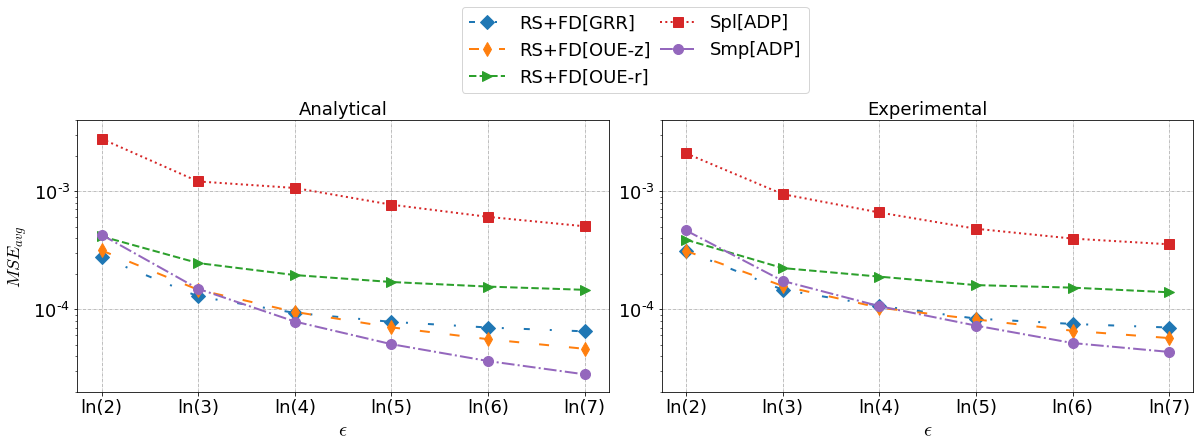

In [19]:
params = {'axes.titlesize':'18',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18',
          'font.size':'18',
          'legend.fontsize':'medium',
          'lines.linewidth':'2',
          'font.weight':'normal',
          'lines.markersize':'10'
          }
matplotlib.rcParams.update(params)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plt.subplots_adjust(wspace=0.1)

ax[0].plot(range(1,len(lst_eps)+1),lst_var_RSpFD_GRR, label='RS+FD[GRR]', marker='D', linestyle=(0, (3, 10, 1, 10)))
ax[0].plot(range(1,len(lst_eps)+1),lst_var_RSpFD_OUE_z, label='RS+FD[OUE-z]',marker='d',linestyle=(0, (5, 10)))
ax[0].plot(range(1,len(lst_eps)+1),lst_var_RSpFD_OUE_r, label='RS+FD[OUE-r]',marker='>',linestyle='dashed')
ax[0].plot(range(1,len(lst_eps)+1),lst_var_Spl_ADP, label='Spl[ADP]',marker='s',linestyle='dotted')
ax[0].plot(range(1,len(lst_eps)+1),lst_var_Smp_ADP, label='Smp[ADP]',marker='o',linestyle='dashdot')

ax[1].plot(vhs_rs_fd_grr.mean(), label='RS+FD[GRR]', marker='D', linestyle=(0, (3, 10, 1, 10)))
ax[1].plot(vhs_rs_fd_oue_z.mean(), label='RS+FD[OUE-z]',marker='d',linestyle=(0, (5, 10)))
ax[1].plot(vhs_rs_fd_oue_r.mean(), label='RS+FD[OUE-r]',marker='>',linestyle='dashed')
ax[1].plot(vhs_spl_adp.mean(), label='Spl[ADP]',marker='s',linestyle='dotted')
ax[1].plot(vhs_smp_adp.mean(), label='Smp[ADP]',marker='o',linestyle='dashdot')

for i in range(2):
    ax[i].grid(color='grey', linestyle='dashdot', linewidth=0.5)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('$\epsilon$', fontsize=20)
    ax[0].set_ylabel('$MSE_{avg}$')
    ax[i].set_xticks(range(1,len(lst_eps)+1))
    ax[i].set_ylim([2e-5,0.4e-2])
    ax[i].set_xticklabels(['ln('+str(val)+')' for val in range(2,8)])
ax[1].legend(ncol=2, columnspacing=0.5, loc='upper center', bbox_to_anchor=(-0.05, 1.45));   
ax[0].set_title('Analytical')
ax[1].set_title('Experimental')
plt.show()